In [135]:
# injecting error as a sine curve
# two parameters to be experimented with, as errors

# Delta = width of the error (time, x-axis)
# delta = 200 datapoints

# H = hight of the error (amplitude, y-axis)
# a = 10 units


Workflow:

* generate error pattern with various Delta & H
* create array of errors
* import base dataset
* create a new dataset by injecting error into base dataset
* feed the new dataset into LSTM algorithm & 
* see the anomay detection response

### Generate error pattern

In [136]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# Sinewave configuration
# https://github.com/biplabro/LSTM-time-series/blob/master/Error_patterns/Sine-wave.ipynb

# y(t) = a*sin(2*π*f*t + Φ)

# amplitude A
a = 10

# frequency F
f = 0.005

# time period
# datapoint taken every 0.5 sec

# total period 200 seconds,2 datapoints per second, positive half cycle 0-100 seconds
tP = np.arange(0,100,0.5) # (start, end, interval)

# total period 200, negative half cycle 100-200 seconds
tN = np.arange(100,200,0.5) # (start, end, interval)

In [138]:
# x axis data tP and tN
# y axis data yP & yN

# sine curve in positive y axis
yP = a*np.sin(2*np.pi*f*tP)

# sine curve in negative y axis
yN = a*np.sin(2*np.pi*f*tN)

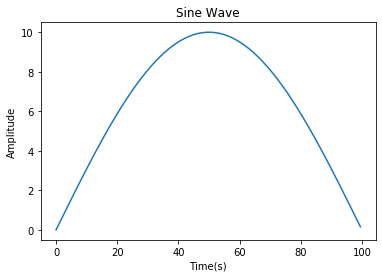

In [139]:
# plot the graph

# Positive cycle
plt.plot(tP,yP) 
plt.title("Sine Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

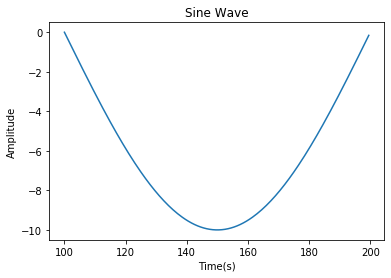

In [140]:
# plot the graph

# Negative cycle
plt.plot(tN,yN) 
plt.title("Sine Wave")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

### Create array of errors

In [141]:
# positive half
yP

array([ 0.        ,  0.15707317,  0.31410759,  0.47106451,  0.6279052 ,
        0.78459096,  0.94108313,  1.09734311,  1.25333234,  1.40901232,
        1.56434465,  1.719291  ,  1.87381315,  2.02787295,  2.18143241,
        2.33445364,  2.48689887,  2.6387305 ,  2.78991106,  2.94040325,
        3.09016994,  3.23917418,  3.3873792 ,  3.53474844,  3.68124553,
        3.82683432,  3.97147891,  4.11514359,  4.25779292,  4.3993917 ,
        4.539905  ,  4.67929814,  4.81753674,  4.95458668,  5.09041416,
        5.22498565,  5.35826795,  5.49022818,  5.62083378,  5.75005252,
        5.87785252,  6.00420225,  6.12907054,  6.25242656,  6.3742399 ,
        6.49448048,  6.61311865,  6.73012514,  6.84547106,  6.95912797,
        7.07106781,  7.18126298,  7.28968627,  7.39631095,  7.5011107 ,
        7.60405966,  7.70513243,  7.80430407,  7.90155012,  7.99684658,
        8.09016994,  8.18149717,  8.27080574,  8.35807361,  8.44327926,
        8.52640164,  8.60742027,  8.68631514,  8.7630668 ,  8.83

In [142]:
# negative half
yN

array([-3.21624530e-15, -1.57073173e-01, -3.14107591e-01, -4.71064507e-01,
       -6.27905195e-01, -7.84590957e-01, -9.41083133e-01, -1.09734311e+00,
       -1.25333234e+00, -1.40901232e+00, -1.56434465e+00, -1.71929100e+00,
       -1.87381315e+00, -2.02787295e+00, -2.18143241e+00, -2.33445364e+00,
       -2.48689887e+00, -2.63873050e+00, -2.78991106e+00, -2.94040325e+00,
       -3.09016994e+00, -3.23917418e+00, -3.38737920e+00, -3.53474844e+00,
       -3.68124553e+00, -3.82683432e+00, -3.97147891e+00, -4.11514359e+00,
       -4.25779292e+00, -4.39939170e+00, -4.53990500e+00, -4.67929814e+00,
       -4.81753674e+00, -4.95458668e+00, -5.09041416e+00, -5.22498565e+00,
       -5.35826795e+00, -5.49022818e+00, -5.62083378e+00, -5.75005252e+00,
       -5.87785252e+00, -6.00420225e+00, -6.12907054e+00, -6.25242656e+00,
       -6.37423990e+00, -6.49448048e+00, -6.61311865e+00, -6.73012514e+00,
       -6.84547106e+00, -6.95912797e+00, -7.07106781e+00, -7.18126298e+00,
       -7.28968627e+00, -

### Import base dataset

In [143]:
df = pd.read_csv('normal_ev_8600_datapoints.csv')

# show stock table, check the value of row 7299, stator_winding.
#The value will be added as offset
df.head(7300)

,data_point,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,1,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,2,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,3,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,4,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,5,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,7296,87.134705,19.259142,72.121735,-96.513962,58.531780,4999.953613,-138.425613,53.453064,69.226501,42.747677,23.915983,48.668121,17
7296,7297,87.075249,19.173750,72.121735,-96.472054,58.558296,4999.952148,-138.527512,53.446396,69.253113,42.747066,23.820192,48.640553,17
7297,7298,87.158875,19.053833,72.121735,-96.504059,58.558323,4999.944824,-138.512543,53.459785,69.225822,42.747272,23.747124,48.617149,17
7298,7299,87.192833,18.931864,72.135780,-96.433640,58.513905,4999.946289,-138.473114,53.432575,69.196747,42.740173,23.679417,48.554394,17


### Create new dataset containing errors

In [144]:
# adding offset to yP
yP = yP+df.iloc[7299]["stator_winding"]

In [145]:
yP

array([72.12200928, 72.27908245, 72.43611687, 72.59307378, 72.74991447,
       72.90660023, 73.06309241, 73.21935239, 73.37534161, 73.5310216 ,
       73.68635393, 73.84130028, 73.99582242, 74.14988223, 74.30344169,
       74.45646292, 74.60890815, 74.76073978, 74.91192034, 75.06241253,
       75.21217922, 75.36118346, 75.50938848, 75.65675772, 75.8032548 ,
       75.9488436 , 76.09348818, 76.23715286, 76.37980219, 76.52140098,
       76.66191427, 76.80130742, 76.93954602, 77.07659596, 77.21242343,
       77.34699492, 77.48027723, 77.61223746, 77.74284306, 77.8720618 ,
       77.9998618 , 78.12621153, 78.25107981, 78.37443584, 78.49624917,
       78.61648976, 78.73512793, 78.85213441, 78.96748034, 79.08113724,
       79.19307709, 79.30327225, 79.41169555, 79.51832023, 79.62311997,
       79.72606893, 79.82714171, 79.92631335, 80.0235594 , 80.11885586,
       80.21217922, 80.30350645, 80.39281502, 80.48008289, 80.56528853,
       80.64841092, 80.72942955, 80.80832442, 80.88507608, 80.95

In [146]:
# insert errors at row = 7300 ; column = "stator_winding"
df.iloc[7300:7500]["stator_winding"]=yP

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
# verify the error injection
df.iloc[7299:7501]["stator_winding"]

7299    72.122009
7300    72.122009
7301    72.279082
7302    72.436117
7303    72.593074
          ...    
7496    72.749914
7497    72.593074
7498    72.436117
7499    72.279082
7500    72.122650
Name: stator_winding, Length: 202, dtype: float64

In [148]:
# libraries required for visualizing data
import matplotlib.pyplot as plt
from plotly import graph_objs as go

In [151]:
### Visualize data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['data_point'], y=df['stator_winding'], name='Temperature'))
fig.update_layout(showlegend=True, title='stator_winding Temp')
fig.show()

In [152]:
# adding offset to yN
yN = yN+df.iloc[7299]["stator_winding"]

In [153]:
# insert errors at row = 8100 ; column = "stator_winding"
df.iloc[8100:8300]["stator_winding"]=yN

/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
# verify the error injection
df.iloc[8099:8301]["stator_winding"]

8099    72.214928
8100    72.122009
8101    71.964936
8102    71.807902
8103    71.650945
          ...    
8296    71.494104
8297    71.650945
8298    71.807902
8299    71.964936
8300    72.123383
Name: stator_winding, Length: 202, dtype: float64

In [155]:
### Visualize data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['data_point'], y=df['stator_winding'], name='Temperature'))
fig.update_layout(showlegend=True, title='stator_winding Temp')
fig.show()

In [156]:
# export the data into new file
df.to_csv('sine-error-ev.csv')

### LSTM algo with error dataset 

In [74]:
# References
# https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe
# https://github.com/biplabro/LSTM-time-series/blob/master/Error_patterns/Sine-wave.ipynb
# https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03
